In [67]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [68]:
def mutagen_length(path):
    try:
        audio = MP3(path)
        length = audio.info.length
        return length
    except:
        return None

In [69]:
files = os.listdir('/Users/josh/Downloads/Noise')

exclude = ['.DS_Store', 'IMG_6485.MOV']

files = [s for s in files if not any(x in s for x in exclude)]

print("Number of files: ", len(files))
print(files)

Number of files:  74
['230914 9_00am.mp4', '231102 3_16am', '231107 8_00pm', '231024 10_36pm', '231109 3_53pm.m4a', '231109 1_24pm.m4a', '230913 8_00pm.m4a', '231024 10_36pm(1)', '231028 6_00pm', '231026 12_45pm', '231106 07_13am.m4a', '231023 4_00pm', '231110 5_15am', '231102 3_12am', 'Comms Record.xlsx', '231104 1116am', '231104 11_18am', '231025 2_00am', '231028 6_00am', '231102 3_19am (b)', '231108 9_20pm', '231109 2_35pm', '231105 05_50am', '231029 5_00am', '231030 8_01pm', '231031 630pm', '230901 1_00pm.m4a', '231101 5_00am', '231109 1_38pm.m4a', '231109 1_45am', '231106 5_34am', '231030 4_45am', '231106 7_54am', '231029 2_00am - this one goes for 19 minutes', '231110 05_51am', '231102 3_20am', '231101 5_00pm', '231109 1_23pm.m4a', '231025 7_45pm', '231109 1_42pm.m4a', '230915 6_00pm.3gp', '231031 320am', '231102 2_30am', '231023 6_00am.m4a', '231106 5_30am', '231031 3_20am', '231026 5_59am', '231030 8_00pm', '231024 10_30pm', '230825 3_00pm.m4a', '231103 6_00am', '231104 11_10am

In [70]:
import dateparser
records = []

for file in files:
    try:
        # print("file: ", file)
        splitto = file.split(" ")
        splitto = [x.split(".")[0] for x in splitto]
        # print("splitto: ", splitto)

        datto = dateparser.parse(splitto[0], date_formats=["%y%m%d"]).strftime("%Y-%m-%d")
        # print(splitto[0])
        # print(datto)

        timmo = dateparser.parse(splitto[1], date_formats=["%H_%M%p"]).strftime("%H:%M%p")
        # print(splitto[1])
        # print(timmo)

        both = f"{datto} {timmo}"
        both = dateparser.parse(both, date_formats=["%Y-%m-%d %H:%M%p"])

        record = {"Date": datto, "Time": timmo, "Datetime": both, "Split": splitto, "Count": 1}
        records.append(record)

    except:
        continue


data = pd.DataFrame.from_records(records)
print(data)
print(data.loc[data['Time'] == "00:00AM"])


          Date     Time            Datetime              Split  Count
0   2023-09-14  09:00AM 2023-09-14 09:00:00   [230914, 9_00am]      1
1   2023-11-02  03:16AM 2023-11-02 03:16:00   [231102, 3_16am]      1
2   2023-11-07  08:00AM 2023-11-07 08:00:00   [231107, 8_00pm]      1
3   2023-10-24  10:36AM 2023-10-24 10:36:00  [231024, 10_36pm]      1
4   2023-11-09  03:53AM 2023-11-09 03:53:00   [231109, 3_53pm]      1
..         ...      ...                 ...                ...    ...
64  2023-11-06  05:36AM 2023-11-06 05:36:00   [231106, 5_36am]      1
65  2023-11-09  01:31AM 2023-11-09 01:31:00   [231109, 1_31pm]      1
66  2023-11-06  05:38AM 2023-11-06 05:38:00   [231106, 5_38am]      1
67  2023-10-26  12:50PM 2023-10-26 12:50:00  [231026, 12_50pm]      1
68  2023-11-05  07:00AM 2023-11-05 07:00:00   [231105, 7_00am]      1

[69 rows x 5 columns]
Empty DataFrame
Columns: [Date, Time, Datetime, Split, Count]
Index: []


In [71]:
df = data.copy()
# 'Date', 'Time', 'Datetime', 'Count'
df.sort_values(by=['Datetime'], ascending=True, inplace=True)

df = df.loc[df['Date'] >= "2023-10-23"]

print("Since the 10th of October we have recorded: ", len(df))


Since the 10th of October we have recorded:  64


In [72]:
### Average per day

zdf = df.copy()
zdf = zdf.groupby(by=['Date'])['Count'].sum().reset_index()

print(zdf.loc[zdf['Count']>=5])

print("Average per day: ", zdf['Count'].mean())

# print(zdf)

          Date  Count
9   2023-11-02      8
13  2023-11-06      9
16  2023-11-09     11
Average per day:  3.5555555555555554


Num days:  18
Earlier than 5:  13
Average hour:  4.722222222222222


<Axes: xlabel='Date', ylabel='Time'>

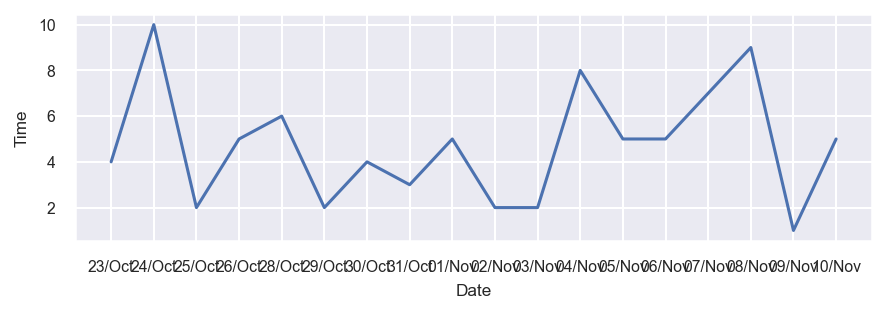

In [93]:
### Average earliest clip

ddf = df.copy()
ddf.drop_duplicates(subset=['Date'], inplace=True)

ddf['Date'] = pd.to_datetime(ddf['Date'], format="%Y-%m-%d")
ddf['Time'] = pd.to_datetime(ddf['Time'], format="%H:%M%p").dt.strftime("%H").astype(int)

# print(ddf)
print("Num days: ", len(ddf))
print("Earlier than 5: ", len(ddf.loc[ddf['Time']<=5]))
print("Average hour: ", ddf['Time'].mean())

sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
              font_scale=0.7)

fig, ax = plt.subplots(figsize=(7, 2))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.lineplot(data=ddf, x="Date", y="Time")

In [ ]:
## Count per day

